## Business Understanding:
The client has collected transactional data for the year 2019 but has not been able to leverage it for insights. They seek to extract meaningful information from the data to identify key opportunities to boost sales and improve operational efficiency. They are specifically interested in understanding revenue trends, seasonality trends, product sales performance, and customer preferences across different time periods and locations. Their goal is to make data-driven decisions to optimize their business operations, sales and makerting strategies and overall business performance.
 
 
 
### Problem Statement:
Our client is unable to utilize their 2019 transactional data effectively to gain business insights. They need to understand product sales performance, identify seasonal trends, and analyze product and city-based performance to uncover sales opportunities and optimize their product offerings and operational strategy. This analysis will inform them to make better data driven business decisions.
 
 
### Project Goal
The objective is to design and deliver an end-to-end business intelligence solution that analyzes the client’s 2019 transactional data by leveraging on the CRISP-DM methodology. The goal is to generate insights on sales trends, seasonality trends, product performance, analyze geographical delivery patterns and provide actionable recommendations to help the client increase sales and improve efficiency. The solution will also categorize products based on their price levels and uncover additional insights beyond the client’s specific questions.
 
 
 
 
##### Stakeholders
 
- Management
- Marketing
- Data Team
 
 
 
 
### Features
 
- Order_ID: It is the unique number of a purchased product
 
- Product: Type of product purchased.
 
- Quantity_Ordered: Number of products purchased
 
- Price_Each: Price per unit of each product purchased
 
- Order_Date: The date the product was purchased
 
- Purchase_Address: The address of the customer
 
 
 
## Hypothesis
 
- High-level products (with prices above $99.99) generate a higher portion of revenue compared to basic-level products.
 
 
 
## Business Questions
 
1. Revenue Analysis: How much revenue was generated in 2019 from all transactions?
 
2. Seasonality Detection: Are there any noticeable seasonal trends in sales (e.g., spikes in specific months or quarters)?
 
3. Product Performance: What are the best-selling and worst-selling products in terms of revenue and quantity sold?
 
4. Time Comparison: How do sales numbers compare across different time periods (months and weeks) ? Are there any trends, patterns or inconsistencies?
 
5. Geographic Distribution: Which cities contribute the most to product deliveries and sales?
 
6. Product Category Analysis: How do product categories compare in terms of revenue generated and quantities sold? Are high-level products driving more revenue compared to basic-level products?
 
 
 
### Additional Insights
 
What additional insights can be derived from the data, such as customer buying behavior, high-performing time periods, or operational inefficiencies?
The answers to these questions will help the client make data-driven decisions to optimize their sales strategy, improve product offerings, and enhance operational efficiency.
 
The final deliverable will be a comprehensive report and dashboard that visualizes these insights, helping the client make data-driven decisions.
 
 
 **Final Hypothesis** :  High-level products (with prices above $99.99) generate a higher portion of revenue compared to basic-level products.

In [15]:
# %pip install pyodbc  
# %pip install python-dotenv
# %pip install squarify
# %pip install statsmodels

In [16]:
import pyodbc #just installed with pip
from dotenv import dotenv_values #import the dotenv_values function from the dotenv package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import squarify
import re
from datetime import datetime

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm



import warnings
warnings.filterwarnings('ignore')



In [17]:
#Load environment variables from .env file into a dictionary

environment_variables=dotenv_values(r'D:\mayaya\Power-Bi-dashboard-project\.env')

# Get the values for the credentials you set in the '.env' file
database = environment_variables.get("database")
server = environment_variables.get("server")
username = environment_variables.get("username")
password = environment_variables.get("password")

connection_string=f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"


In [19]:
# Use the connect method of the pyodbc library and pass in the connection string.
# This will connect to the server

connection=pyodbc.connect(connection_string)

In [20]:
db_query='''SELECT * 
FROM INFORMATION_SCHEMA.TABLES
WHERE TABLE_SCHEMA= 'dbo' '''

In [21]:
data_2= pd.read_sql(db_query, connection)
 
data_2
 

,TABLE_CATALOG,TABLE_SCHEMA,TABLE_NAME,TABLE_TYPE
0,dapDB,dbo,Sales_July_2019,BASE TABLE
1,dapDB,dbo,Sales_August_2019,BASE TABLE
2,dapDB,dbo,Sales_September_2019,BASE TABLE
3,dapDB,dbo,Sales_October_2019,BASE TABLE
4,dapDB,dbo,Sales_November_2019,BASE TABLE
5,dapDB,dbo,Sales_December_2019,BASE TABLE


In [22]:
#Loading July_2019
 
query = "SELECT * FROM dbo.Sales_July_2019"
Jul_2019 = pd.read_sql(query, connection)

In [23]:
#Loading Aug_2019 

query = "SELECT * FROM dbo.Sales_August_2019"
Aug_2019 = pd.read_sql(query, connection)

In [24]:
#Loading Sep_2019
 
query = "SELECT * FROM dbo.Sales_September_2019"
Sep_2019 = pd.read_sql(query, connection)

In [25]:
#Loading Oct_2019
 
query = "SELECT * FROM dbo.Sales_October_2019"
Oct_2019 = pd.read_sql(query, connection)
 

In [26]:
#Loading Nov_2019
 
query = "SELECT * FROM dbo.Sales_November_2019"
Nov_2019 = pd.read_sql(query, connection)                                                

In [27]:
# Load Dec_2019
query = "SELECT * FROM dbo.Sales_December_2019"
Dec_2019 = pd.read_sql(query, connection)

#### Load the data from the source (Jan_2019 - Jun_2019)
 

In [29]:
Jan_2019= pd.read_csv('../Data/Sales_January_2019.csv')
Feb_2019= pd.read_csv('../Data/Sales_February_2019.csv')
Mar_2019= pd.read_csv('../Data/Sales_March_2019.csv')
Apr_2019= pd.read_csv('../Data/Sales_April_2019.csv')
May_2019= pd.read_csv('../Data/Sales_May_2019.csv')
Jun_2019= pd.read_csv('../Data/Sales_June_2019.csv')

### **Exploring All Datasets (EDA) & Data Cleaning**

A deep dive and observation to have an overview on the kind of dataset we are dealing with. (variables, data types, inconsistencies e.t.c)

In [30]:
Jan_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [31]:
Feb_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,150502,iPhone,1,700,02/18/19 01:35,"866 Spruce St, Portland, ME 04101"
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016"
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001"
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301"
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101"


In [32]:
Mar_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016"


In [33]:
Apr_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [34]:
May_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001"
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001"
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001"
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001"
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101"


In [35]:
Jun_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101"
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016"
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001"
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101"
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016"


In [36]:
Jul_2019.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,222910.0,Apple Airpods Headphones,1.0,150.00,2026-07-19 16:51:00.0000000,"389 South St, Atlanta, GA 30301"
1,222911.0,Flatscreen TV,1.0,300.00,2005-07-19 08:55:00.0000000,"590 4th St, Seattle, WA 98101"
2,222912.0,AA Batteries (4-pack),1.0,3.84,2029-07-19 12:41:00.0000000,"861 Hill St, Atlanta, GA 30301"
3,222913.0,AA Batteries (4-pack),1.0,3.84,2028-07-19 10:15:00.0000000,"190 Ridge St, Atlanta, GA 30301"
4,222914.0,AAA Batteries (4-pack),5.0,2.99,2031-07-19 02:13:00.0000000,"824 Forest St, Seattle, WA 98101"


In [37]:
Aug_2019.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,236670.0,Wired Headphones,2.0,11.990000,2031-08-19 22:21:00.0000000,"359 Spruce St, Seattle, WA 98101"
1,236671.0,Bose SoundSport Headphones,1.0,99.989998,2015-08-19 15:11:00.0000000,"492 Ridge St, Dallas, TX 75001"
2,236672.0,iPhone,1.0,700.000000,2006-08-19 14:40:00.0000000,"149 7th St, Portland, OR 97035"
3,236673.0,AA Batteries (4-pack),2.0,3.840000,2029-08-19 20:59:00.0000000,"631 2nd St, Los Angeles, CA 90001"
4,236674.0,AA Batteries (4-pack),2.0,3.840000,2015-08-19 19:53:00.0000000,"736 14th St, New York City, NY 10001"


In [38]:
Sep_2019.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,248151.0,AA Batteries (4-pack),4.0,3.840000,2017-09-19 14:44:00.0000000,"380 North St, Los Angeles, CA 90001"
1,248152.0,USB-C Charging Cable,2.0,11.950000,2029-09-19 10:19:00.0000000,"511 8th St, Austin, TX 73301"
2,248153.0,USB-C Charging Cable,1.0,11.950000,2016-09-19 17:48:00.0000000,"151 Johnson St, Los Angeles, CA 90001"
3,248154.0,27in FHD Monitor,1.0,149.990005,2027-09-19 07:52:00.0000000,"355 Hickory St, Seattle, WA 98101"
4,248155.0,USB-C Charging Cable,1.0,11.950000,2001-09-19 19:03:00.0000000,"125 5th St, Atlanta, GA 30301"


In [39]:
Nov_2019.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,278797.0,Wired Headphones,1.0,11.990000,2021-11-19 09:54:00.0000000,"46 Park St, New York City, NY 10001"
1,278798.0,USB-C Charging Cable,2.0,11.950000,2017-11-19 10:03:00.0000000,"962 Hickory St, Austin, TX 73301"
2,278799.0,Apple Airpods Headphones,1.0,150.000000,2019-11-19 14:56:00.0000000,"464 Cherry St, Los Angeles, CA 90001"
3,278800.0,27in FHD Monitor,1.0,149.990005,2025-11-19 22:24:00.0000000,"649 10th St, Seattle, WA 98101"
4,278801.0,Bose SoundSport Headphones,1.0,99.989998,2009-11-19 13:56:00.0000000,"522 Hill St, Boston, MA 02215"


In [40]:
Dec_2019.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,295665.0,Macbook Pro Laptop,1.0,1700.000000,2030-12-19 00:01:00.0000000,"136 Church St, New York City, NY 10001"
1,295666.0,LG Washing Machine,1.0,600.000000,2029-12-19 07:03:00.0000000,"562 2nd St, New York City, NY 10001"
2,295667.0,USB-C Charging Cable,1.0,11.950000,2012-12-19 18:21:00.0000000,"277 Main St, New York City, NY 10001"
3,295668.0,27in FHD Monitor,1.0,149.990005,2022-12-19 15:13:00.0000000,"410 6th St, San Francisco, CA 94016"
4,295669.0,USB-C Charging Cable,1.0,11.950000,2018-12-19 12:38:00.0000000,"43 Hill St, Atlanta, GA 30301"


#### Rename the columns

In [41]:
# Rename the columns
Jan_2019.rename(columns={'Order ID': 'Order_ID', 'Product Name': 'Product', 'Quantity Ordered': 'Quantity_Ordered', 'Price Each': 'Price_Each', 'Order Date': 'Order_Date', 'Purchase Address': 'Purchase_Address'}, inplace=True)
Feb_2019.rename(columns={'Order ID': 'Order_ID', 'Product Name': 'Product', 'Quantity Ordered': 'Quantity_Ordered', 'Price Each': 'Price_Each', 'Order Date': 'Order_Date', 'Purchase Address': 'Purchase_Address'}, inplace=True)
Mar_2019.rename(columns={'Order ID': 'Order_ID', 'Product Name': 'Product', 'Quantity Ordered': 'Quantity_Ordered', 'Price Each': 'Price_Each', 'Order Date': 'Order_Date', 'Purchase Address': 'Purchase_Address'}, inplace=True)
Apr_2019.rename(columns={'Order ID': 'Order_ID', 'Product Name': 'Product', 'Quantity Ordered': 'Quantity_Ordered', 'Price Each': 'Price_Each', 'Order Date': 'Order_Date', 'Purchase Address': 'Purchase_Address'}, inplace=True)
May_2019.rename(columns={'Order ID': 'Order_ID', 'Product Name': 'Product', 'Quantity Ordered': 'Quantity_Ordered', 'Price Each': 'Price_Each', 'Order Date': 'Order_Date', 'Purchase Address': 'Purchase_Address'}, inplace=True)
Jun_2019.rename(columns={'Order ID': 'Order_ID', 'Product Name': 'Product', 'Quantity Ordered': 'Quantity_Ordered', 'Price Each': 'Price_Each', 'Order Date': 'Order_Date', 'Purchase Address': 'Purchase_Address'}, inplace=True)

#### **Concatenate all the datasets from Jan_2019 to Dec 2019**

In [42]:
# Combine all datasets by column names
getINNOtized_sales_2019 = pd.concat([Jan_2019, Feb_2019, Mar_2019, Apr_2019, May_2019, Jun_2019, Jul_2019, Aug_2019, Sep_2019, Oct_2019, Nov_2019, Dec_2019])

In [43]:
getINNOtized_sales_2019.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [44]:
getINNOtized_sales_2019.tail()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
25112,319666.0,Lightning Charging Cable,1.0,14.95,2011-12-19 20:58:00.0000000,"14 Madison St, San Francisco, CA 94016"
25113,319667.0,AA Batteries (4-pack),2.0,3.84,2001-12-19 12:01:00.0000000,"549 Willow St, Los Angeles, CA 90001"
25114,319668.0,Vareebadd Phone,1.0,400.0,2009-12-19 06:43:00.0000000,"273 Wilson St, Seattle, WA 98101"
25115,319669.0,Wired Headphones,1.0,11.99,2003-12-19 10:39:00.0000000,"778 River St, Dallas, TX 75001"
25116,319670.0,Bose SoundSport Headphones,1.0,99.989998,2021-12-19 21:45:00.0000000,"747 Chestnut St, Los Angeles, CA 90001"


In [45]:
getINNOtized_sales_2019.shape

(186850, 6)

In [46]:
getINNOtized_sales_2019.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186850 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order_ID          186110 non-null  object
 1   Product           186305 non-null  object
 2   Quantity_Ordered  186110 non-null  object
 3   Price_Each        186110 non-null  object
 4   Order_Date        186110 non-null  object
 5   Purchase_Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [47]:
getINNOtized_sales_2019.duplicated().sum()

np.int64(1161)

In [48]:
getINNOtized_sales_2019.isnull().sum()

Order_ID            740
Product             545
Quantity_Ordered    740
Price_Each          740
Order_Date          740
Purchase_Address    545
dtype: int64

In [49]:
getINNOtized_sales_2019.isnull().mean()*100

Order_ID            0.396040
Product             0.291678
Quantity_Ordered    0.396040
Price_Each          0.396040
Order_Date          0.396040
Purchase_Address    0.291678
dtype: float64

In [50]:
getINNOtized_sales_2019.nunique()

Order_ID            178438
Product                 20
Quantity_Ordered        18
Price_Each              40
Order_Date          142396
Purchase_Address    140788
dtype: int64

In [51]:
getINNOtized_sales_2019["Product"].unique()[:50]

array(['iPhone', 'Lightning Charging Cable', 'Wired Headphones',
       '27in FHD Monitor', 'AAA Batteries (4-pack)',
       '27in 4K Gaming Monitor', 'USB-C Charging Cable',
       'Bose SoundSport Headphones', 'Apple Airpods Headphones',
       'Macbook Pro Laptop', 'Flatscreen TV', 'Vareebadd Phone',
       'AA Batteries (4-pack)', 'Google Phone', '20in Monitor',
       '34in Ultrawide Monitor', 'ThinkPad Laptop', 'LG Dryer',
       'LG Washing Machine', nan, 'Product', None], dtype=object)

In [52]:
getINNOtized_sales_2019["Quantity_Ordered"].unique()[:50]

array(['1', '2', '3', '5', '4', nan, '7', 'Quantity Ordered', '6', '9',
       1.0, 5.0, 2.0, 3.0, 4.0, 6.0, 7.0, 8.0, 9.0], dtype=object)

In [53]:
getINNOtized_sales_2019["Purchase_Address"].unique()[:10]

array(['944 Walnut St, Boston, MA 02215',
       '185 Maple St, Portland, OR 97035',
       '538 Adams St, San Francisco, CA 94016',
       '738 10th St, Los Angeles, CA 90001',
       '387 10th St, Austin, TX 73301',
       '775 Willow St, San Francisco, CA 94016',
       '979 Park St, Los Angeles, CA 90001',
       '181 6th St, San Francisco, CA 94016',
       '867 Willow St, Los Angeles, CA 90001',
       '657 Johnson St, San Francisco, CA 94016'], dtype=object)

In [54]:
getINNOtized_sales_2019["Purchase_Address"].unique()[:10]

array(['944 Walnut St, Boston, MA 02215',
       '185 Maple St, Portland, OR 97035',
       '538 Adams St, San Francisco, CA 94016',
       '738 10th St, Los Angeles, CA 90001',
       '387 10th St, Austin, TX 73301',
       '775 Willow St, San Francisco, CA 94016',
       '979 Park St, Los Angeles, CA 90001',
       '181 6th St, San Francisco, CA 94016',
       '867 Willow St, Los Angeles, CA 90001',
       '657 Johnson St, San Francisco, CA 94016'], dtype=object)

In [55]:
getINNOtized_sales_2019["Order_ID"].unique()[:10]

array(['141234', '141235', '141236', '141237', '141238', '141239',
       '141240', '141241', '141242', '141243'], dtype=object)

In [56]:
getINNOtized_sales_2019["Order_Date"].unique()[:500]

array(['01/22/19 21:25', '01/28/19 14:15', '01/17/19 13:33',
       '01/05/19 20:33', '01/25/19 11:59', '01/29/19 20:22',
       '01/26/19 12:16', '01/05/19 12:04', '01/01/19 10:30',
       '01/22/19 21:20', '01/07/19 11:29', '01/31/19 10:12',
       '01/09/19 18:57', '01/25/19 19:19', '01/03/19 21:54',
       '01/05/19 17:20', '01/10/19 11:20', '01/24/19 08:13',
       '01/30/19 09:28', '01/17/19 00:09', '01/08/19 11:51',
       '01/09/19 20:55', '01/29/19 10:40', '01/12/19 18:51',
       '01/19/19 21:47', '01/20/19 17:26', '01/01/19 22:00',
       '01/09/19 18:14', '01/16/19 12:35', '01/11/19 23:33',
       '01/03/19 09:46', '01/01/19 16:52', '01/02/19 22:21',
       '01/09/19 08:28', '01/14/19 10:13', '01/03/19 20:05',
       '01/27/19 23:10', '01/30/19 10:51', '01/12/19 13:09',
       '01/29/19 12:04', '01/17/19 11:30', '01/07/19 16:06',
       '01/21/19 22:23', '01/13/19 19:07', '01/26/19 12:14',
       '01/03/19 19:10', '01/20/19 16:10', '01/05/19 16:51',
       '01/11/19 18:10',

In [57]:
getINNOtized_sales_2019.describe().T

,count,unique,top,freq
Order_ID,186110,178438,Order ID,160
Product,186305,20,USB-C Charging Cable,21903
Quantity_Ordered,186110.0,18.0,1.0,91347.0
Price_Each,186110.0,40.0,11.95,11951.0
Order_Date,186110,142396,Order Date,160
Purchase_Address,186305,140788,Purchase Address,355


### Observations

The output shows that the Sales_2019 dataset is a pandas DataFrame with 186,850 entries and 6 columns. The columns in the dataset are Order_ID, Product, Quantity_Ordered, Price_Each, Order_Date and Purchase_Address.
The data types of all columns are object, indicating that the values in these columns are strings.

The dataset has a total of 10,224 rows (186,850 entries and 186,110 non-null entries).

This shows the number of unique values in each column. This information can be useful for understanding the diversity of values in each column and identifying any potential patterns or trends.:

- Order_ID: There are 178,438 unique values.
- Product: There are 20 unique values.this  column has invalid or missing entries such as nan, Product, and None which need to be corrected, imputed.

- Quantity_Ordered: There are 18 unique values. It has  invalid or missing entries such as nan, Quantity Ordered which need to be corrected, imputed.

- Price_Each: There are 40 unique values. it contains invalid values such as nan, Price Each, and some floating-point precision issues (e.g., 3.8399999141693115) which need to be corrected, imputed and round up to 2 decimal 
- Order_Date: There are 14,239 unique values.
- Purchase_Address: There are 14,078 unique values.

**N.B** data types of Columns like : 
- Quantity_Ordered need to be changed from object to integer
- Price_Each from Object to Float
- Order_Date from object to datetime









### Data validation & Cleaning

The existence of duplicates and null-values is crucial and can affect the data integrity, quality and accuracy in analysis. Therefore duplicate values and null-values is handled by conducting data cleaning on the dataset.

In [58]:
getINNOtized_sales_2019= getINNOtized_sales_2019.drop_duplicates(keep='first')
getINNOtized_sales_2019

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
25112,319666.0,Lightning Charging Cable,1.0,14.95,2011-12-19 20:58:00.0000000,"14 Madison St, San Francisco, CA 94016"
25113,319667.0,AA Batteries (4-pack),2.0,3.84,2001-12-19 12:01:00.0000000,"549 Willow St, Los Angeles, CA 90001"
25114,319668.0,Vareebadd Phone,1.0,400.0,2009-12-19 06:43:00.0000000,"273 Wilson St, Seattle, WA 98101"
25115,319669.0,Wired Headphones,1.0,11.99,2003-12-19 10:39:00.0000000,"778 River St, Dallas, TX 75001"


In [59]:
# Remove invalid and missing entries in the Product column
getINNOtized_sales_2019 = getINNOtized_sales_2019[getINNOtized_sales_2019['Product'].notna()]
getINNOtized_sales_2019 = getINNOtized_sales_2019[getINNOtized_sales_2019['Product'] != 'Product']
getINNOtized_sales_2019 = getINNOtized_sales_2019[getINNOtized_sales_2019['Product'] != 'None']


In [60]:
# Convert the Price_Each column to numeric, forcing invalid entries (like 'Price Each') to NaN
getINNOtized_sales_2019['Price_Each'] = pd.to_numeric(getINNOtized_sales_2019['Price_Each'], errors='coerce')

# Remove rows with NaN values in Price_Each
getINNOtized_sales_2019 = getINNOtized_sales_2019.dropna(subset=['Price_Each'])

# Round the prices to 2 decimal places
getINNOtized_sales_2019['Price_Each'] = getINNOtized_sales_2019['Price_Each'].round(2)


In [61]:
# Check for missing values in Purchase_Address
missing_address = getINNOtized_sales_2019['Purchase_Address'].isnull().sum()
print(f'Missing addresses: {missing_address}')

# Drop rows with missing Purchase_Address
getINNOtized_sales_2019 = getINNOtized_sales_2019.dropna(subset=['Purchase_Address'])


Missing addresses: 0


In [62]:
# Convert Order_ID to string
getINNOtized_sales_2019['Order_ID'] = getINNOtized_sales_2019['Order_ID'].astype(str)


In [63]:
# Convert Quantity_Ordered to integer
getINNOtized_sales_2019['Quantity_Ordered'] = pd.to_numeric(getINNOtized_sales_2019['Quantity_Ordered'], errors='coerce').astype('Int64')


In [64]:
# Convert Order_Date to datetime
getINNOtized_sales_2019['Order_Date'] = pd.to_datetime(getINNOtized_sales_2019['Order_Date'], errors='coerce')


In [65]:
# Verify data types after conversions
print(getINNOtized_sales_2019.dtypes)


Order_ID                    object
Product                     object
Quantity_Ordered             Int64
Price_Each                 float64
Order_Date          datetime64[ns]
Purchase_Address            object
dtype: object


In [66]:
getINNOtized_sales_2019.isnull().sum()

Order_ID            0
Product             0
Quantity_Ordered    0
Price_Each          0
Order_Date          0
Purchase_Address    0
dtype: int64

In [67]:
# Convert 'Price_Each' to dollars
getINNOtized_sales_2019['Price_Each'] = getINNOtized_sales_2019['Price_Each'].apply(lambda x: x * 1.00)

#### Create a column for Revenue

In [68]:
#  Create a new column 'Total_Revenue' by multiplying 'Quantity_Ordered' and 'Price_Each'
getINNOtized_sales_2019['Total_Revenue'] = getINNOtized_sales_2019['Quantity_Ordered'] * getINNOtized_sales_2019['Price_Each']

In [69]:
getINNOtized_sales_2019.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Total_Revenue
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.0
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.95
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.98
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.99
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.99


In [70]:
# Create a new column 'Product_Level' based on the condition of 'Price_Each'
getINNOtized_sales_2019['Product_Level'] = np.where(getINNOtized_sales_2019['Price_Each'] > 99.99, 'High-Level', 'Basic-Level')
getINNOtized_sales_2019

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Total_Revenue,Product_Level
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.0,High-Level
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.95,Basic-Level
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.98,Basic-Level
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.99,High-Level
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.99,Basic-Level
...,...,...,...,...,...,...,...,...
25112,319666.0,Lightning Charging Cable,1,14.95,2011-12-19 20:58:00,"14 Madison St, San Francisco, CA 94016",14.95,Basic-Level
25113,319667.0,AA Batteries (4-pack),2,3.84,2001-12-19 12:01:00,"549 Willow St, Los Angeles, CA 90001",7.68,Basic-Level
25114,319668.0,Vareebadd Phone,1,400.00,2009-12-19 06:43:00,"273 Wilson St, Seattle, WA 98101",400.0,High-Level
25115,319669.0,Wired Headphones,1,11.99,2003-12-19 10:39:00,"778 River St, Dallas, TX 75001",11.99,Basic-Level


#### Extract year, month, day, hour, and minute

In [71]:
getINNOtized_sales_2019['Year'] = getINNOtized_sales_2019['Order_Date'].dt.year
getINNOtized_sales_2019['Quarter'] = getINNOtized_sales_2019['Order_Date'].dt.quarter 
getINNOtized_sales_2019['Month'] = getINNOtized_sales_2019['Order_Date'].dt.month
getINNOtized_sales_2019['Day'] = getINNOtized_sales_2019['Order_Date'].dt.day
getINNOtized_sales_2019['Hour'] = getINNOtized_sales_2019['Order_Date'].dt.hour
getINNOtized_sales_2019['Minute'] = getINNOtized_sales_2019['Order_Date'].dt.minute


In [72]:
getINNOtized_sales_2019

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Total_Revenue,Product_Level,Year,Quarter,Month,Day,Hour,Minute
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.0,High-Level,2019,1,1,22,21,25
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.95,Basic-Level,2019,1,1,28,14,15
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.98,Basic-Level,2019,1,1,17,13,33
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.99,High-Level,2019,1,1,5,20,33
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.99,Basic-Level,2019,1,1,25,11,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25112,319666.0,Lightning Charging Cable,1,14.95,2011-12-19 20:58:00,"14 Madison St, San Francisco, CA 94016",14.95,Basic-Level,2011,4,12,19,20,58
25113,319667.0,AA Batteries (4-pack),2,3.84,2001-12-19 12:01:00,"549 Willow St, Los Angeles, CA 90001",7.68,Basic-Level,2001,4,12,19,12,1
25114,319668.0,Vareebadd Phone,1,400.00,2009-12-19 06:43:00,"273 Wilson St, Seattle, WA 98101",400.0,High-Level,2009,4,12,19,6,43
25115,319669.0,Wired Headphones,1,11.99,2003-12-19 10:39:00,"778 River St, Dallas, TX 75001",11.99,Basic-Level,2003,4,12,19,10,39


In [73]:
# Filter rows where the year is greater than 2019
filtered_data = getINNOtized_sales_2019[getINNOtized_sales_2019["Year"] > 2019]

# Display the filtered data
print(filtered_data)


       Order_ID                     Product  Quantity_Ordered  Price_Each  \
0      222910.0    Apple Airpods Headphones                 1      150.00   
2      222912.0       AA Batteries (4-pack)                 1        3.84   
3      222913.0       AA Batteries (4-pack)                 1        3.84   
4      222914.0      AAA Batteries (4-pack)                 5        2.99   
6      222916.0                Google Phone                 1      600.00   
...         ...                         ...               ...         ...   
25102  319656.0    Apple Airpods Headphones                 1      150.00   
25104  319658.0      AAA Batteries (4-pack)                 2        2.99   
25108  319662.0  Bose SoundSport Headphones                 1       99.99   
25110  319664.0             ThinkPad Laptop                 1      999.99   
25116  319670.0  Bose SoundSport Headphones                 1       99.99   

               Order_Date                          Purchase_Address  \
0   

In [74]:
# Sum of rows where the Year is greater than 2019
year_greater_than_2019_count = (getINNOtized_sales_2019["Year"] > 2019).sum()

# Print the result
print(f"Number of rows where the Year is greater than 2019: {year_greater_than_2019_count}")


Number of rows where the Year is greater than 2019: 38419


In [75]:
# Convert all years greater than 2019 to 2019
getINNOtized_sales_2019.loc[getINNOtized_sales_2019["Year"] > 2019, "Year"] = 2019

# Display the updated data to confirm the change
print(getINNOtized_sales_2019["Year"].unique())


[2019 2005 2003 2017 2014 2002 2013 2009 2015 2004 2018 2007 2016 2010
 2008 2006 2001 2011 2012]


In [76]:
# Sum of rows where the Year is greater than 2019
year_greater_than_2019_count = (getINNOtized_sales_2019["Year"] < 2019).sum()

# Print the result
print(f"Number of rows where the Year is greater than 2000: {year_greater_than_2019_count}")


Number of rows where the Year is greater than 2000: 58789


In [77]:
# Sum of rows where the Year is greater than 2019
year_greater_than_2019_count = (getINNOtized_sales_2019["Year"] == 2019).sum()

# Print the result
print(f"Number of rows where the Year is greater than 2019: {year_greater_than_2019_count}")


Number of rows where the Year is greater than 2019: 126897


In [78]:
# Create a new DataFrame to store final
getINNOtized_sales_2019 = getINNOtized_sales_2019.copy()
# Extract the city from 'Purchase_Address'
getINNOtized_sales_2019['City'] = getINNOtized_sales_2019['Purchase_Address'].apply(lambda x: x.split(',')[1].strip() if ',' in x else None)

# Display the first few rows to check if the city was extracted correctly
print(getINNOtized_sales_2019[['Purchase_Address', 'City']].head())

                        Purchase_Address           City
0        944 Walnut St, Boston, MA 02215         Boston
1       185 Maple St, Portland, OR 97035       Portland
2  538 Adams St, San Francisco, CA 94016  San Francisco
3     738 10th St, Los Angeles, CA 90001    Los Angeles
4          387 10th St, Austin, TX 73301         Austin


In [79]:
getINNOtized_sales_2019

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Total_Revenue,Product_Level,Year,Quarter,Month,Day,Hour,Minute,City
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.0,High-Level,2019,1,1,22,21,25,Boston
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.95,Basic-Level,2019,1,1,28,14,15,Portland
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.98,Basic-Level,2019,1,1,17,13,33,San Francisco
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.99,High-Level,2019,1,1,5,20,33,Los Angeles
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.99,Basic-Level,2019,1,1,25,11,59,Austin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25112,319666.0,Lightning Charging Cable,1,14.95,2011-12-19 20:58:00,"14 Madison St, San Francisco, CA 94016",14.95,Basic-Level,2011,4,12,19,20,58,San Francisco
25113,319667.0,AA Batteries (4-pack),2,3.84,2001-12-19 12:01:00,"549 Willow St, Los Angeles, CA 90001",7.68,Basic-Level,2001,4,12,19,12,1,Los Angeles
25114,319668.0,Vareebadd Phone,1,400.00,2009-12-19 06:43:00,"273 Wilson St, Seattle, WA 98101",400.0,High-Level,2009,4,12,19,6,43,Seattle
25115,319669.0,Wired Headphones,1,11.99,2003-12-19 10:39:00,"778 River St, Dallas, TX 75001",11.99,Basic-Level,2003,4,12,19,10,39,Dallas


### Hypothesis Testing

In [81]:
import scipy.stats as stats
# Test the hypothesis using ANOVA (Analysis of Variance)


# Step 2: Perform ANOVA
# Split the data into two groups based on 'Product_Level'
high_level_products = getINNOtized_sales_2019[getINNOtized_sales_2019['Product_Level'] == 'High-Level']['Total_Revenue']
basic_level_products = getINNOtized_sales_2019[getINNOtized_sales_2019['Product_Level'] == 'Basic-Level']['Total_Revenue']

# Perform ANOVA
f_value, p_value = stats.f_oneway(high_level_products, basic_level_products)

# Step 3: Interpret the results
alpha = 0.05  # Significance level

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in revenue between high-level and basic-level products.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in revenue between high-level and basic-level products.")

Reject the null hypothesis. There is a significant difference in revenue between high-level and basic-level products.


Rejecting the Null Hypothesis: If the p-value is less than 0.05, it indicates that there is a significant difference in revenue between high-level and basic-level products.


1. Interpretation of the Outcome
- Reject the Null Hypothesis: The result indicates that there is a statistically significant difference in the total revenue generated by high-level products compared to basic-level products.
- Significance: This suggests that high-level products (priced above $99.99) are generating a different level of revenue compared to basic-level products (priced $99.99 or below). The revenue difference is not due to random chance but rather indicates a real effect.

2. Implications
- For Business Strategy: If you are a business, this result suggests that high-level products are significantly more profitable. You might want to consider focusing more on high-level products or exploring what makes them more successful.
- For Marketing: Understanding that high-level products generate significantly more revenue can help tailor marketing efforts and promotions to boost sales in this category.

3. Follow-Up Actions
- Further Analysis: You might want to explore additional factors affecting revenue or perform a more detailed analysis on why high-level products are more successful.
- Business Decisions: Use this insight to inform pricing strategies, product development, or investment decisions.


### Exploratory Data Analysis

In [82]:
# Summary Statistics for numerical Columns

summary_stats = getINNOtized_sales_2019.describe()

summary_stats

,Quantity_Ordered,Price_Each,Order_Date,Total_Revenue,Year,Quarter,Month,Day,Hour,Minute
count,185686.0,185686.000000,185686,185686.0,185686.000000,185686.000000,185686.000000,185686.000000,185686.000000,185686.000000
mean,1.124544,184.519255,2017-11-12 13:09:00.319571456,185.611936,2016.000372,2.681317,7.058653,17.443076,14.412934,29.480537
min,1.0,2.990000,2001-01-20 00:10:00,2.99,2001.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.0,11.950000,2015-08-19 19:22:15,11.95,2015.000000,2.000000,4.000000,17.000000,11.000000,14.000000
50%,1.0,14.950000,2019-03-26 14:19:30,14.95,2019.000000,3.000000,7.000000,19.000000,15.000000,29.000000
75%,1.0,150.000000,2019-06-20 17:08:45,150.0,2019.000000,4.000000,10.000000,19.000000,19.000000,45.000000
max,9.0,1700.000000,2031-12-19 23:53:00,3400.0,2019.000000,4.000000,12.000000,31.000000,23.000000,59.000000
std,0.443069,332.843838,NaN,333.032118,5.287052,1.135367,3.502932,6.126800,5.423329,17.317681


In [86]:
# Step 1: Check the data types of the columns
print(getINNOtized_sales_2019.dtypes)

# Step 2: Select only numeric columns
numeric_columns = getINNOtized_sales_2019.select_dtypes(include='number')

# Step 3: Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Display the correlation matrix
print(correlation_matrix)

Order_ID                    object
Product                     object
Quantity_Ordered             Int64
Price_Each                 float64
Order_Date          datetime64[ns]
Purchase_Address            object
Total_Revenue              Float64
Product_Level               object
Year                         int32
Quarter                      int32
Month                        int32
Day                          int32
Hour                         int32
Minute                       int32
City                        object
dtype: object
                  Quantity_Ordered  Price_Each  Total_Revenue      Year  \
Quantity_Ordered          1.000000   -0.148422      -0.139564 -0.001130   
Price_Each               -0.148422    1.000000       0.999202 -0.001682   
Total_Revenue            -0.139564    0.999202       1.000000 -0.001610   
Year                     -0.001130   -0.001682      -0.001610  1.000000   
Quarter                   0.000298   -0.003407      -0.003483 -0.468663   
Month      

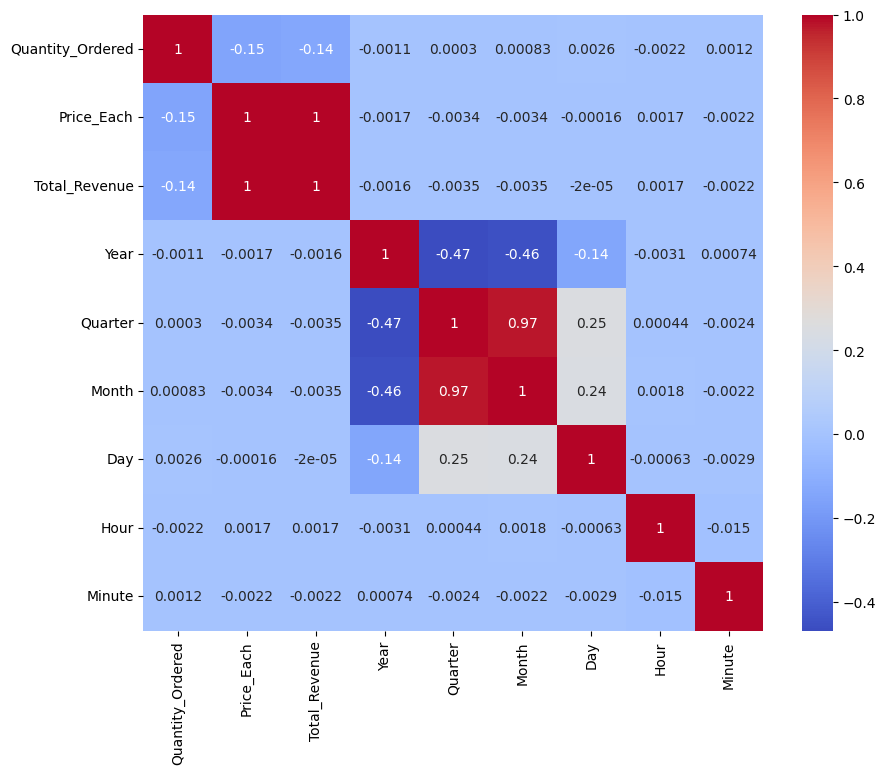

In [87]:
# Plot a heatmap of the Correlation Matrix

# Set the figure size
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

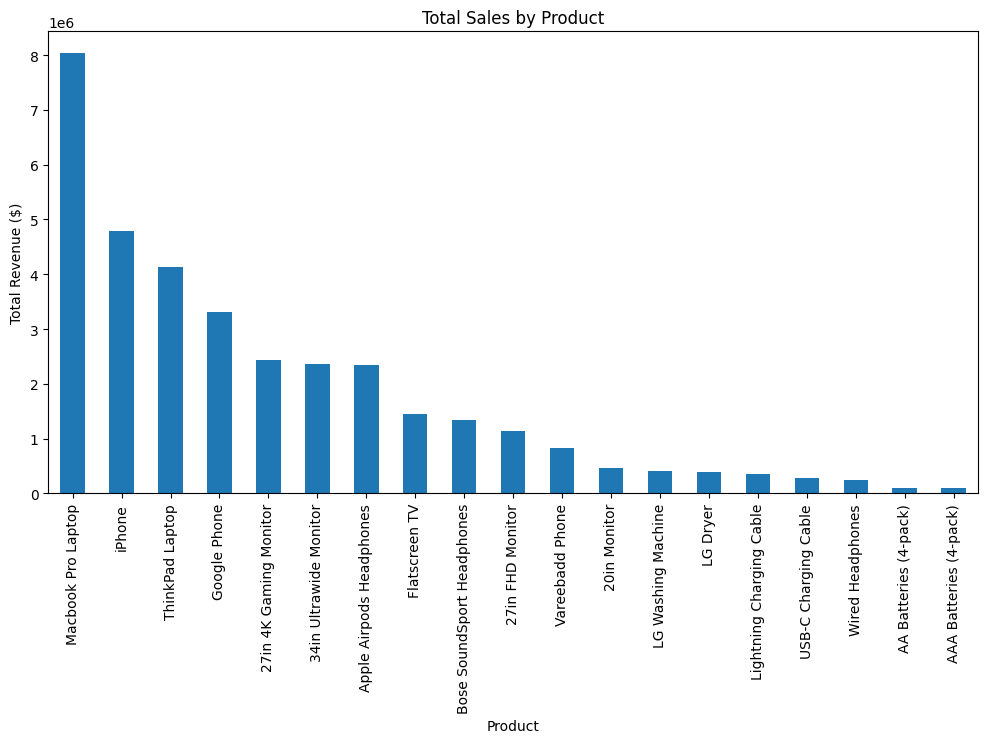

In [88]:
# Group by product and calculate total sales for each product
product_sales = getINNOtized_sales_2019.groupby('Product')['Total_Revenue'].sum().sort_values(ascending=False)
# Print the product sales
# print(product_sales)

# Plot a bar chart for product sales
plt.figure(figsize=(12, 6))
product_sales.plot(kind='bar')
plt.xlabel('Product')
plt.ylabel('Total Revenue ($)')
plt.title('Total Sales by Product')
plt.xticks(rotation=90)
plt.show()

Total Revenue by Product Level:
Product_Level
Basic-Level      2419990.2
High-Level     32045547.74
Name: Total_Revenue, dtype: Float64


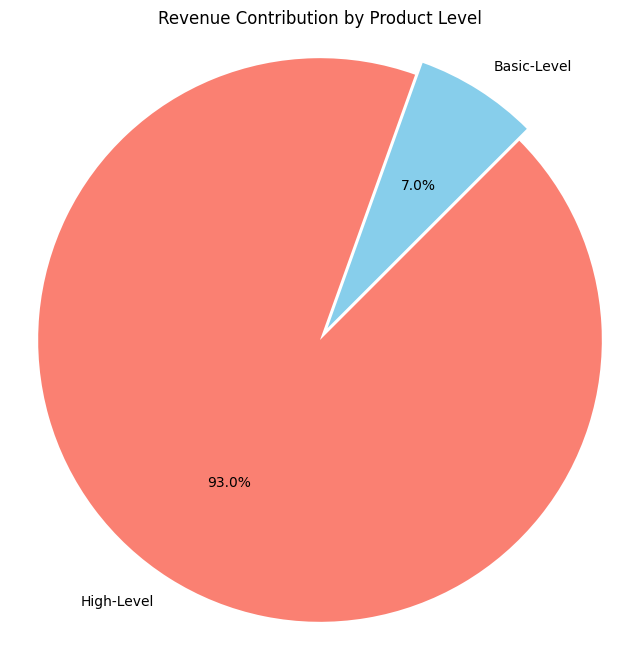

In [89]:
# Group by product level (High-Level, Basic-Level) and calculate total revenue
product_level_revenue = getINNOtized_sales_2019.groupby('Product_Level')['Total_Revenue'].sum()

# Display the revenue for each product level
print("Total Revenue by Product Level:")
print(product_level_revenue)

# Plot a pie chart to visualize the revenue contribution of high-level and basic-level products
plt.figure(figsize=(8, 8))
plt.pie(product_level_revenue, labels=product_level_revenue.index, autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=45, explode=[0.05, 0])
plt.title('Revenue Contribution by Product Level')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle
plt.show()

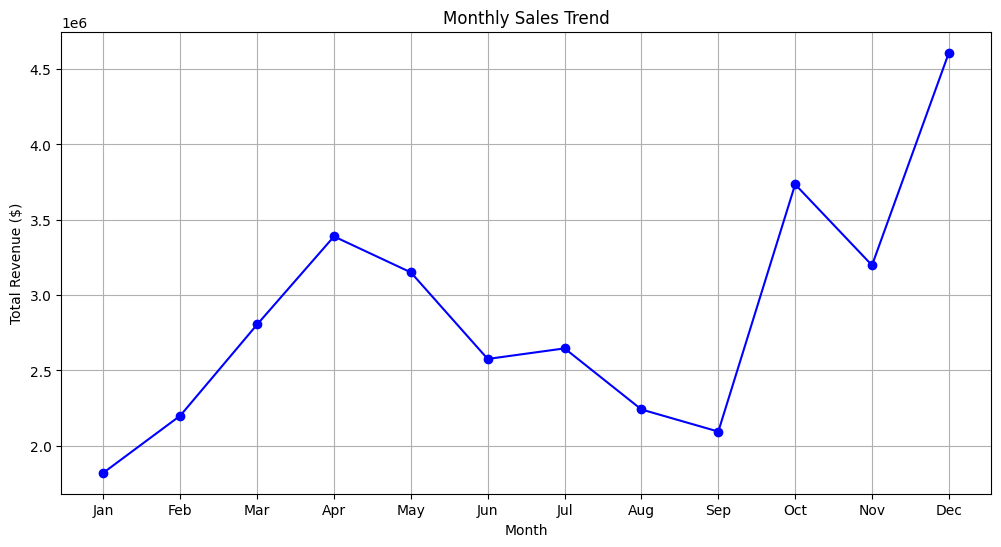

In [90]:
# Calculate total revenue per month
monthly_sales = getINNOtized_sales_2019.groupby('Month')['Total_Revenue'].sum()

# Plot the monthly sales trend
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', color='blue')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.grid(True)
plt.show()


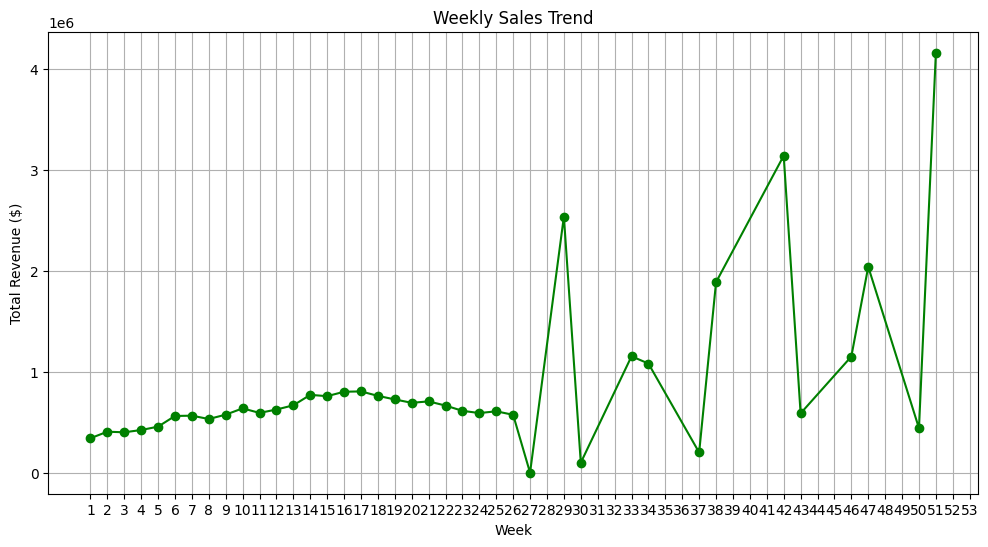

In [91]:
# Create a new column 'Week' to extract the week number from the 'Order_Date' column
getINNOtized_sales_2019['Week'] = getINNOtized_sales_2019['Order_Date'].dt.isocalendar().week

# Calculate total revenue per week
weekly_sales = getINNOtized_sales_2019.groupby('Week')['Total_Revenue'].sum()

# Plot the weekly sales trend
plt.figure(figsize=(12, 6))
weekly_sales.plot(kind='line', marker='o', color='green')
plt.title('Weekly Sales Trend')
plt.xlabel('Week')
plt.ylabel('Total Revenue ($)')
plt.xticks(ticks=range(1, 54))  # 1 to 53 weeks in a year (ISO calendar)
plt.grid(True)
plt.show()

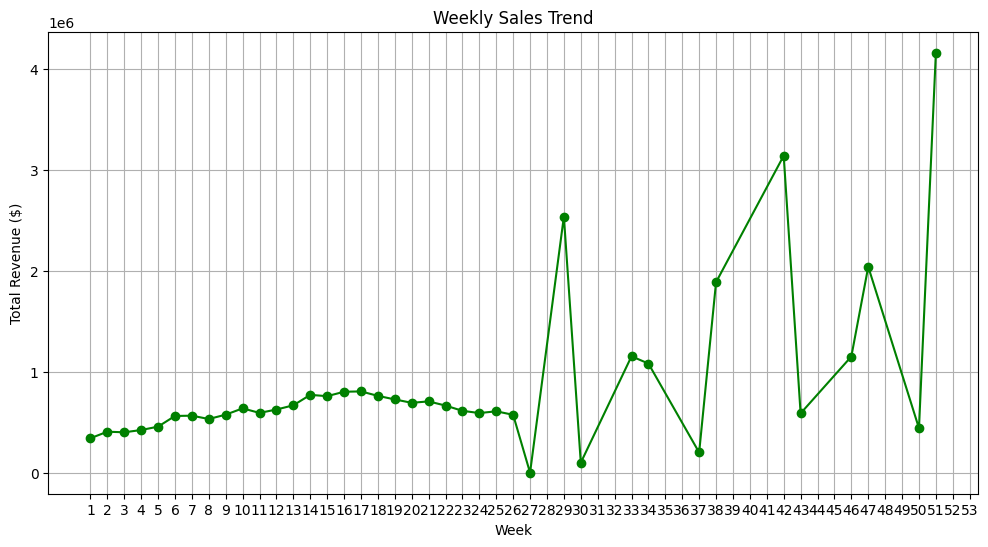

In [92]:
# Create a new column 'Week' to extract the week number from the 'Order_Date' column
getINNOtized_sales_2019['Week'] = getINNOtized_sales_2019['Order_Date'].dt.isocalendar().week

# Calculate total revenue per week
weekly_sales = getINNOtized_sales_2019.groupby('Week')['Total_Revenue'].sum()

# Plot the weekly sales trend
plt.figure(figsize=(12, 6))
weekly_sales.plot(kind='line', marker='o', color='green')
plt.title('Weekly Sales Trend')
plt.xlabel('Week')
plt.ylabel('Total Revenue ($)')
plt.xticks(ticks=range(1, 54))  # 1 to 53 weeks in a year (ISO calendar)
plt.grid(True)
plt.show()

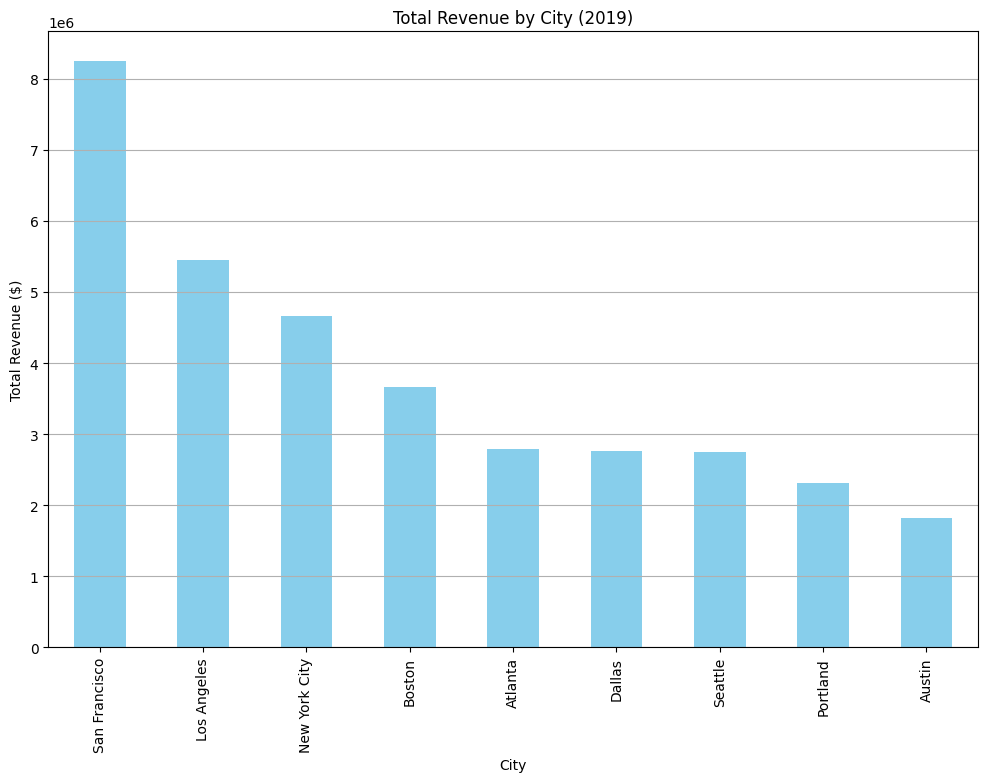

In [94]:
# Group by 'City' to calculate total revenue per city
revenue_by_city = getINNOtized_sales_2019.groupby('City')['Total_Revenue'].sum().sort_values(ascending=False)

# Plot the total revenue by city
plt.figure(figsize=(12, 8))
revenue_by_city.plot(kind='bar', color='skyblue')
plt.title('Total Revenue by City (2019)')
plt.xlabel('City')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=90)
plt.grid(axis='y')

# Display the plot
plt.show()

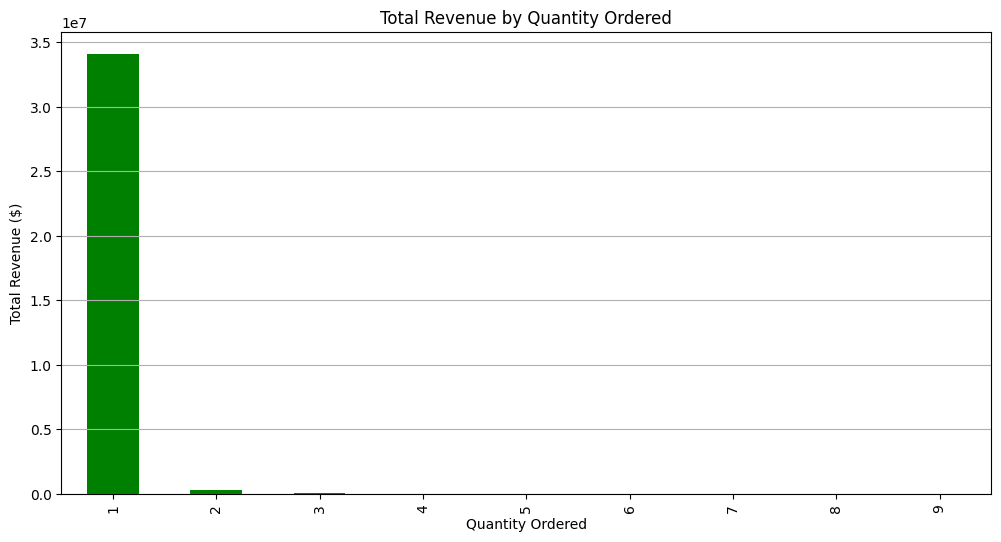

In [95]:
# Group by 'Quantity_Ordered' and sum the 'Total_Revenue'
revenue_by_quantity = getINNOtized_sales_2019.groupby('Quantity_Ordered')['Total_Revenue'].sum()

# Plot the total revenue by quantity ordered
plt.figure(figsize=(12, 6))
revenue_by_quantity.plot(kind='bar', color='green')
plt.title('Total Revenue by Quantity Ordered')
plt.xlabel('Quantity Ordered')
plt.ylabel('Total Revenue ($)')
plt.grid(True, axis='y')

# Display the plot
plt.show()

### Answer Busimess Analytical Question

In [96]:
# 1. Revenue Analysis: How much revenue was generated in 2019 from all transactions?

# Total revenue for 2019
total_revenue_2019 = getINNOtized_sales_2019['Total_Revenue'].sum()
print(f"Total Revenue Generated in 2019: ${total_revenue_2019:.2f}")


Total Revenue Generated in 2019: $34465537.94


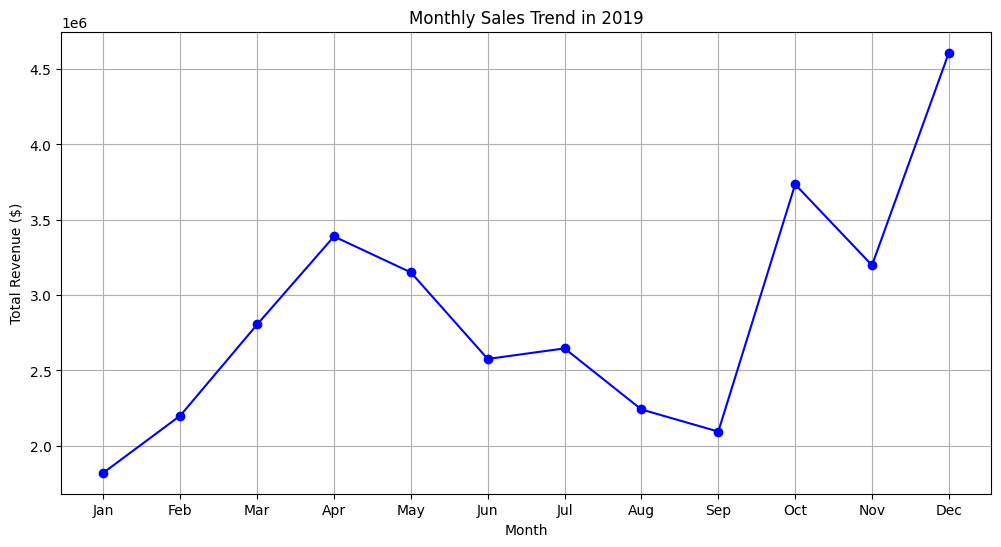

In [97]:
# 2. 2. Seasonality Detection: Are there any noticeable seasonal trends in sales (e.g., spikes in specific months or quarters)?

# Group by month to detect seasonality in sales
monthly_revenue = getINNOtized_sales_2019.groupby('Month')['Total_Revenue'].sum()

# Plot the seasonal trend in sales
plt.figure(figsize=(12, 6))
monthly_revenue.plot(kind='line', marker='o', color='blue')
plt.title('Monthly Sales Trend in 2019')
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()


Best-Selling Products (Revenue):
                        Total_Revenue  Quantity_Ordered
Product                                                
Macbook Pro Laptop          8032500.0              4725
iPhone                      4792900.0              6847
ThinkPad Laptop            4127958.72              4128
Google Phone                3317400.0              5529
27in 4K Gaming Monitor     2433147.61              6239

Worst-Selling Products (Revenue):
                          Total_Revenue  Quantity_Ordered
Product                                                  
AAA Batteries (4-pack)         92648.14             30986
AA Batteries (4-pack)          106041.6             27615
Wired Headphones              246082.76             20524
USB-C Charging Cable          285975.45             23931
Lightning Charging Cable      346376.55             23169


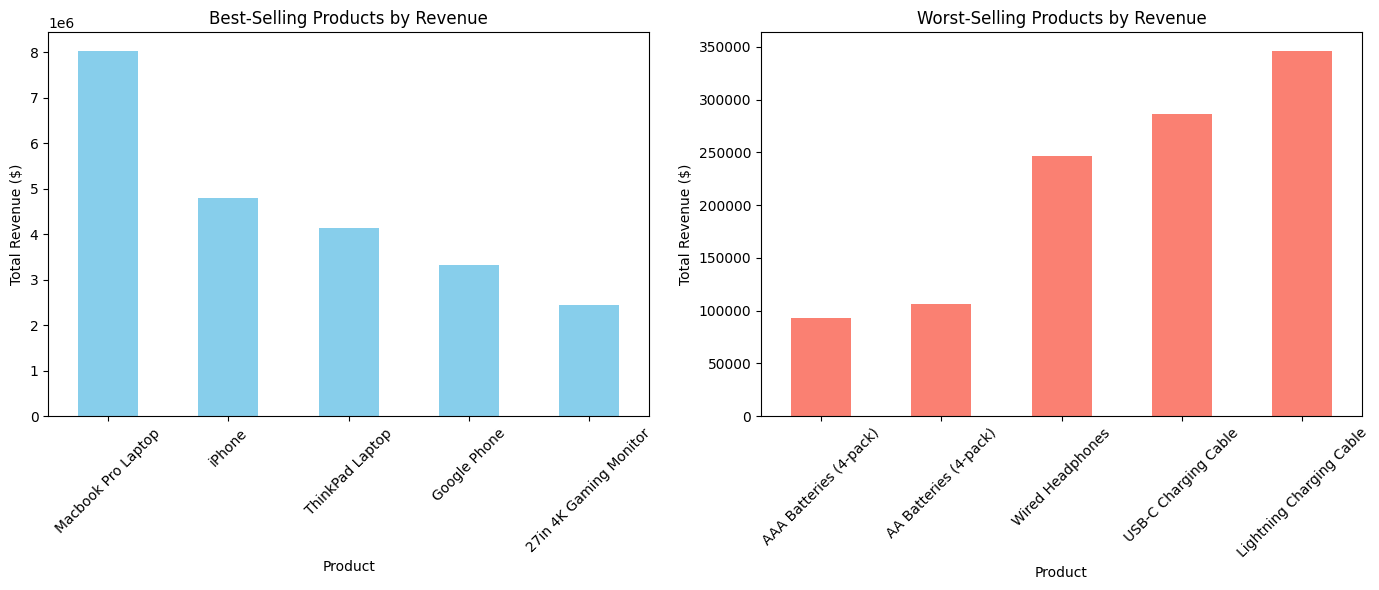

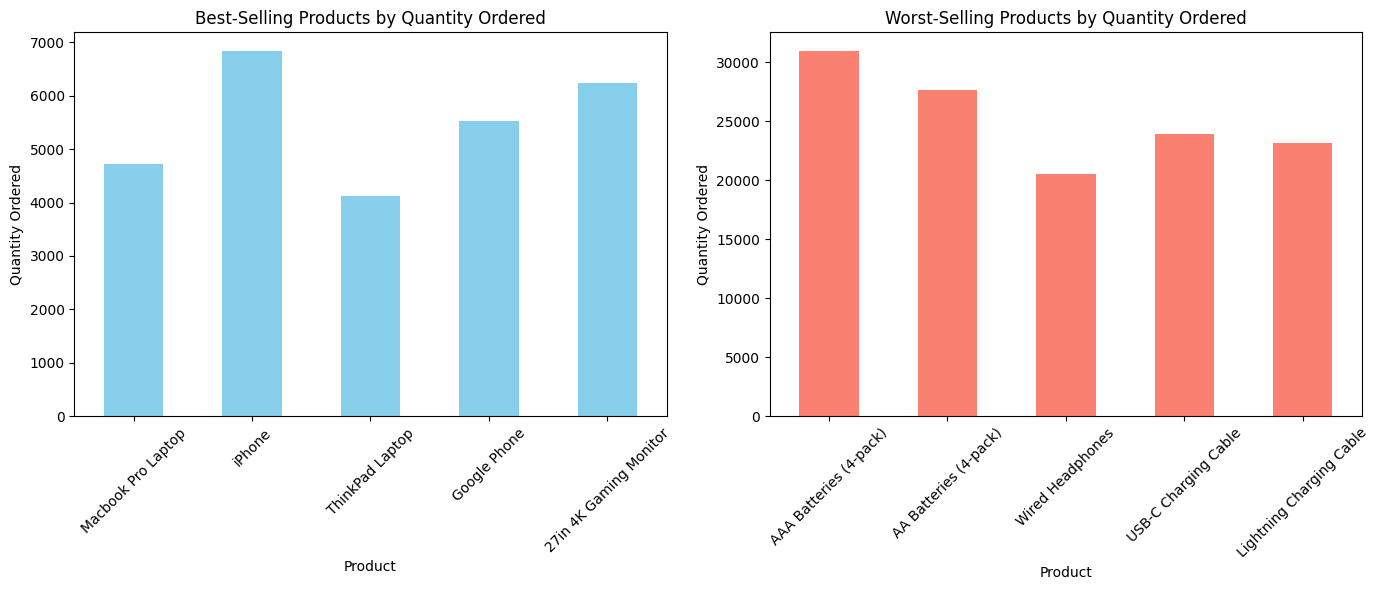

In [98]:
# 3. Product Performance: What are the best-selling and worst-selling products in terms of revenue and quantity sold?

# Group by product and calculate total revenue and quantity sold
product_performance = getINNOtized_sales_2019.groupby('Product')[['Total_Revenue', 'Quantity_Ordered']].sum()

# Sort products by total revenue and quantity sold
best_selling_products = product_performance.sort_values('Total_Revenue', ascending=False).head(5)
worst_selling_products = product_performance.sort_values('Total_Revenue', ascending=True).head(5)

# Display the results
print("Best-Selling Products (Revenue):")
print(best_selling_products)
print("\nWorst-Selling Products (Revenue):")
print(worst_selling_products)

# Plotting the best-selling products
plt.figure(figsize=(14, 6))

# Plot Total Revenue for Best-Selling Products
plt.subplot(1, 2, 1)
best_selling_products['Total_Revenue'].plot(kind='bar', color='skyblue')
plt.title('Best-Selling Products by Revenue')
plt.xlabel('Product')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)

# Plot Total Revenue for Worst-Selling Products
plt.subplot(1, 2, 2)
worst_selling_products['Total_Revenue'].plot(kind='bar', color='salmon')
plt.title('Worst-Selling Products by Revenue')
plt.xlabel('Product')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Plot Quantity Ordered for Best-Selling Products
plt.figure(figsize=(14, 6))

# Plot Quantity Ordered for Best-Selling Products
plt.subplot(1, 2, 1)
best_selling_products['Quantity_Ordered'].plot(kind='bar', color='skyblue')
plt.title('Best-Selling Products by Quantity Ordered')
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.xticks(rotation=45)

# Plot Quantity Ordered for Worst-Selling Products
plt.subplot(1, 2, 2)
worst_selling_products['Quantity_Ordered'].plot(kind='bar', color='salmon')
plt.title('Worst-Selling Products by Quantity Ordered')
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


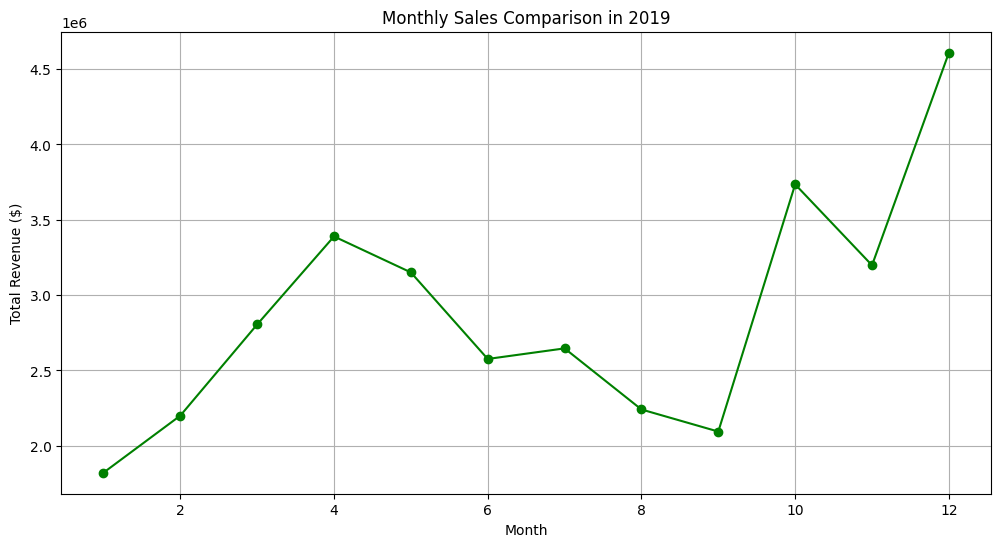

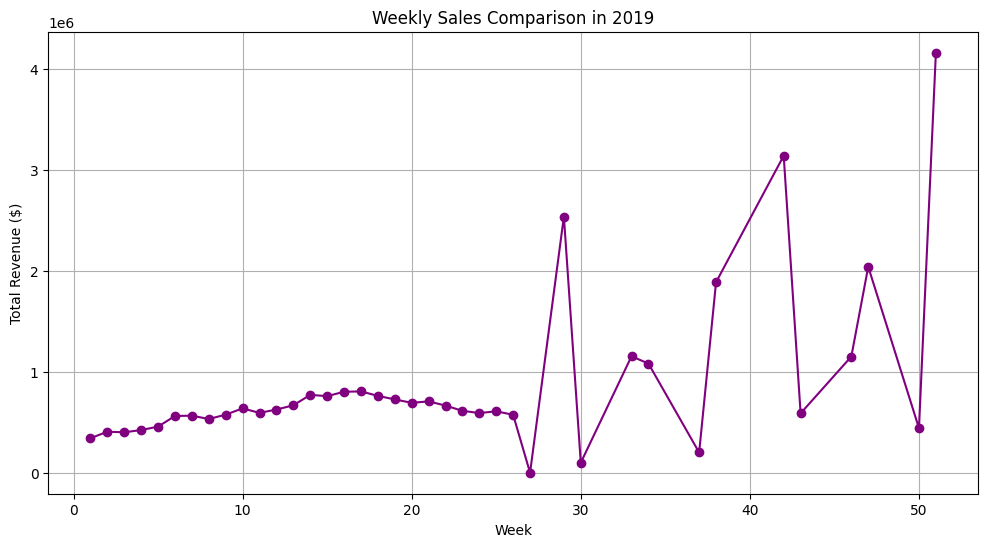

In [99]:

# 4. Time Comparison: How do sales numbers compare across different time periods (months and weeks) ? Are there any trends, patterns or inconsistencies?

# Sales comparison by month
monthly_sales = getINNOtized_sales_2019.groupby('Month')['Total_Revenue'].sum()

# Sales comparison by week
weekly_sales = getINNOtized_sales_2019.groupby('Week')['Total_Revenue'].sum()

# Plot monthly sales comparison
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', color='green')
plt.title('Monthly Sales Comparison in 2019')
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.grid(True)
plt.show()

# Plot weekly sales comparison
plt.figure(figsize=(12, 6))
weekly_sales.plot(kind='line', marker='o', color='purple')
plt.title('Weekly Sales Comparison in 2019')
plt.xlabel('Week')
plt.ylabel('Total Revenue ($)')
plt.grid(True)
plt.show()



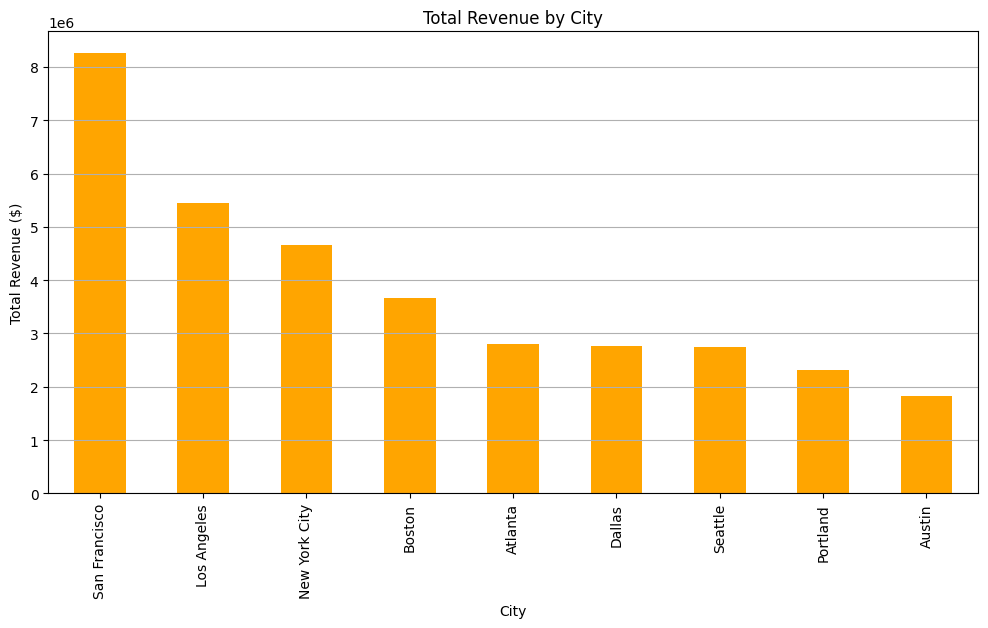

In [100]:
# 5. Geographic Distribution: Which cities contribute the most to product deliveries and sales?

# Group by city and calculate total revenue
city_sales = getINNOtized_sales_2019.groupby('City')['Total_Revenue'].sum()

# Plot sales by city
plt.figure(figsize=(12, 6))
city_sales.sort_values(ascending=False).plot(kind='bar', color='orange')
plt.title('Total Revenue by City')
plt.xlabel('City')
plt.ylabel('Total Revenue ($)')
plt.grid(True, axis='y')
plt.show()


Product Category Analysis:
               Total_Revenue  Quantity_Ordered
Product_Level                                 
Basic-Level        2419990.2            139655
High-Level       32045547.74             69157


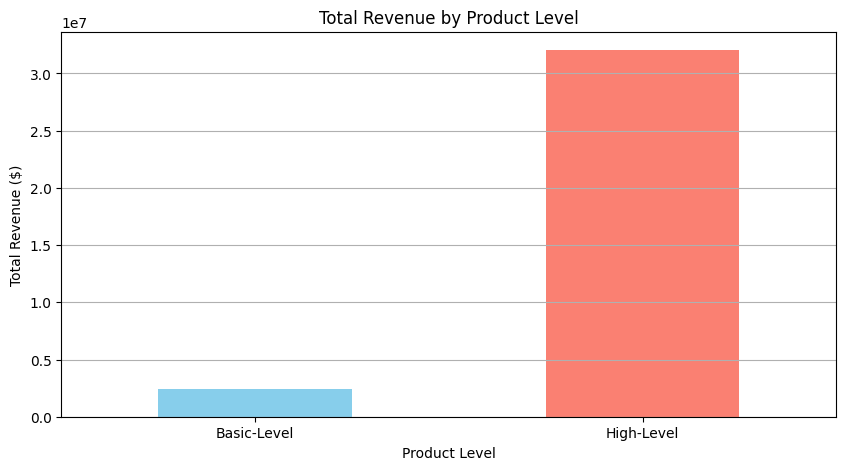

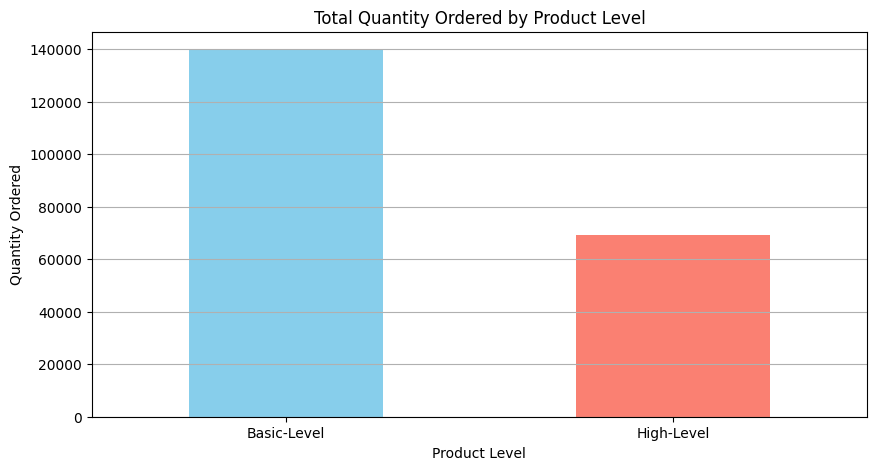

In [101]:
# 6. Product Category Analysis: Compare product categories in terms of revenue and quantities sold
# Group by product level (High-Level, Basic-Level) and calculate total revenue and quantities sold
category_performance = getINNOtized_sales_2019.groupby('Product_Level')[['Total_Revenue', 'Quantity_Ordered']].sum()

# Print the product category analysis
print("Product Category Analysis:")
print(category_performance)

# Plot revenue by product level
plt.figure(figsize=(10, 5))
category_performance['Total_Revenue'].plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Total Revenue by Product Level')
plt.xlabel('Product Level')
plt.ylabel('Total Revenue ($)')
plt.grid(True, axis='y')
plt.xticks(rotation=0)  # Improve readability
plt.show()

# Plot quantity sold by product level
plt.figure(figsize=(10, 5))
category_performance['Quantity_Ordered'].plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Total Quantity Ordered by Product Level')
plt.xlabel('Product Level')
plt.ylabel('Quantity Ordered')
plt.grid(True, axis='y')
plt.xticks(rotation=0)  # Improve readability
plt.show()


In [102]:
csv_filename='getINNOtized_sales_2019.csv'
getINNOtized_sales_2019.to_csv(csv_filename,index= False)

### **Key Insight**